# 차원축소 Assignment2

- 제출자: 20기 황태연
- 제출 일자: 2023.08.15. (화)

## MNIST data에 적용을 해보기

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요

In [8]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [9]:
mnist = io.loadmat('mnist-original.mat') #mnist 손글씨 데이터를 불러옵니다
X = mnist['data'].T
y = mnist['label'].T

# 데이터 정보!
- 7만개의 작은 숫자 이미지
- 행 열이 반대로 되어있음 -> 전치
- grayscale 28x28 pixel = 784 feature
- 각 picel은 0~255의 값
- label = 1~10 label이 총 10개인거에 주목하자

In [10]:
print(X.shape, y.shape)

(70000, 784) (70000, 1)


In [11]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [13]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


<Figure size 640x480 with 0 Axes>

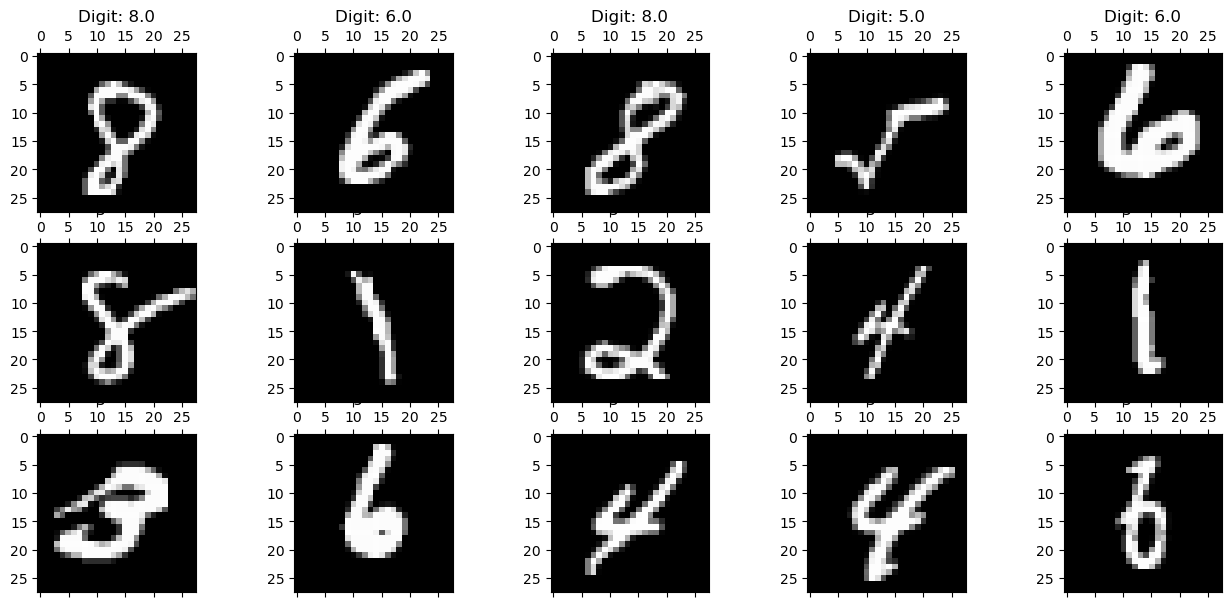

In [14]:
# 데이터 형태 시각화

import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

### 1) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할 해 주세요

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((56000, 784), (14000, 784), (56000, 1), (14000, 1))

### 여기서부터는 원본데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교해주세요

### 2) 차원축소 기법(PCA와 LDA)을 이용하여 mnist data를 축소시켜주세요

pca를 이용할 때는, 주성분 개수를 정하는 과정에 대해 잘 서술해주시면 좋겠죠!<br>
강의에서 배웠던 3가지 중 어떤 걸 고려해서 갯수를 정했는지요!!!!<br>
scree plot같은거는 직접 그려서 확인해주면 좋겠죠???

- **PCA**

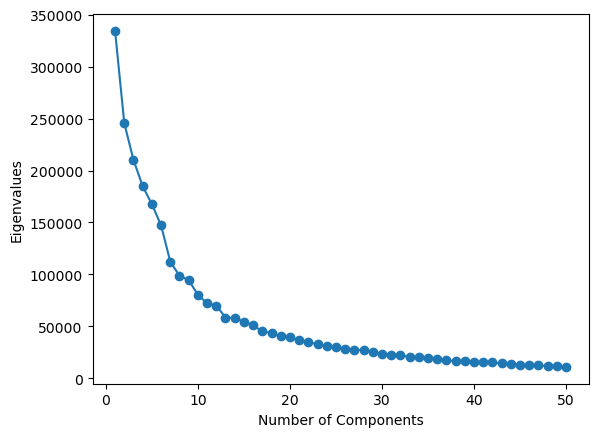

In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components=X_train.shape[1])
new_X = pca.fit_transform(X_train)

k = np.arange(1, 51)
eigenvalues = pca.explained_variance_ # 고윳값 추출, 고윳값은 큰 순서대로 나열되어 있다.
plt.plot(k, eigenvalues[:50], marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalues')
plt.show()

- Elbow point를 찾는 것은 주관적인 영역이므로, **누적설명률**을 기준으로 찾아보겠습니다.
- **누적설명률**: PCA에서 $k$개의 주성분을 택했을 때 누적설명률은 다음과 같다.
$$
P(k) = \frac{\sum_{i=1}^{k} eigenvalue(i)}{\sum_{i=1}^{n} eigenvalue(i)}
$$

- 누적설명률이 80%인 지점을 기준으로 삼고 주성분 개수를 택하겠습니다.

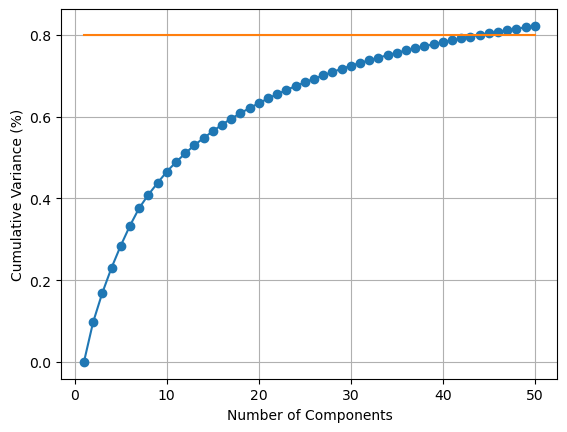

In [42]:
cumulative_variance = [sum(eigenvalues[:i])/sum(eigenvalues) for i in range(len(eigenvalues))]
plt.plot(k, cumulative_variance[:50], marker='o')
plt.plot(k, [0.8]*50)
plt.grid()
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance (%)')
plt.show()

In [44]:
for i in range(50):
    if cumulative_variance[i] > 0.8:
        print(f'누적 설명률이 80%가 넘어가는 최초의 지점은 {i+1} 입니다.')
        break

누적 설명률이 80%가 넘어가는 최초의 지점은 44 입니다.


- 따라서 PCA에서 주성분을 44개로 택하여 데이터를 축소하겠습니다.

In [48]:
pca = PCA(44)
X_train_pca = pca.fit_transform(X_train)
X_train_pca.shape

(56000, 44)

- **LDA**

- LDA에서는 5개의 원소를 택하겠습니다.

In [84]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=5)  # 5개의 주성분을 택한다.
X_train_lda = lda.fit_transform(X_train, y_train.reshape(-1)) # y_train을 1차원으로 변경해야 경고가 사라진다.

X_train_lda.shape

(56000, 5)

### 3) 지금까지 배웠던 머신러닝 기법을 이용하여 학습해주세요 (2개이상 사용)

###  이때 time stamp를 찍어서 training 시간을 비교하고, test accuracy도 비교해주세요
#### (원본 데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교)

- **로지스틱 회귀 모델**과 **랜덤 포레스트 모델**을 이용하여 학습해보겠습니다.

- **로지스틱 회귀 모델**

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time

def logistic(X_train, X_test, y_train, y_test):
    """
    output: 학습 시간(s), 정확도(%)
    """
    start = time.time()
    
    # 학습
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    # 정확도 측정
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    end = time.time()
    
    return end-start, accuracy*100

In [81]:
import warnings
warnings.filterwarnings("ignore") # 경고 메시지 무시

y_train, y_test = y_train.reshape(-1), y_test.reshape(-1)
time_original, acc_original = logistic(X_train, X_test, y_train, y_test)
time_pca, acc_pca = logistic(X_train_pca, pca.transform(X_test), y_train, y_test)
time_lda, acc_lda = logistic(X_train_lda, lda.transform(X_test), y_train, y_test)
print('|| 로지스틱 회귀 모델 ||')
print(f'| Original | {time_original:.3f}s | {acc_original:.3f}% |')
print(f'|    PCA   | {time_pca:.3f}s | {acc_pca:.3f}% |')
print(f'|    LDA   | {time_lda:.3f}s | {acc_lda:.3f}% |')

|| 로지스틱 회귀 모델 ||
| Original | 5.285s | 92.129% |
|    PCA   | 2.003s | 90.486% |
|    LDA   | 1.285s | 83.243% |


- **랜덤 포레스트 모델**

In [82]:
from sklearn.ensemble import RandomForestClassifier

def random_forest(X_train, X_test, y_train, y_test):
    """
    output: 학습 시간(s), 정확도(%)
    """
    start = time.time()
    
    # 학습
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    
    # 정확도 측정
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    end = time.time()
    
    return end-start, accuracy*100

In [83]:
y_train, y_test = y_train.reshape(-1), y_test.reshape(-1)
time_original, acc_original = random_forest(X_train, X_test, y_train, y_test)
time_pca, acc_pca = random_forest(X_train_pca, pca.transform(X_test), y_train, y_test)
time_lda, acc_lda = random_forest(X_train_lda, lda.transform(X_test), y_train, y_test)
print('|| 랜덤 포레스트 모델 ||')
print(f'| Original | {time_original:.3f}s | {acc_original:.3f}% |')
print(f'|    PCA   | {time_pca:.3f}s | {acc_pca:.3f}% |')
print(f'|    LDA   | {time_lda:.3f}s | {acc_lda:.3f}% |')

|| 랜덤 포레스트 모델 ||
| Original | 18.452s | 96.950% |
|    PCA   | 21.509s | 95.371% |
|    LDA   | 7.305s | 84.664% |


- 원본 데이터는 정확도가 높지만 시간이 많이 걸립니다.
- PCA는 정확도가 원본 데이터보다 약간 낮아지지만, 빠르게 학습하도록 합니다. (단, 랜덤 포레스트에서는 학습 속도가 오히려 늦어집니다.)
- LDA는 정확도가 크게 낮아지지만, 매우 빠르게 학습하도록 합니다.